<a href="https://colab.research.google.com/github/Pontibesties/Proyecto-Big-Data/blob/main/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <span style="color:red">

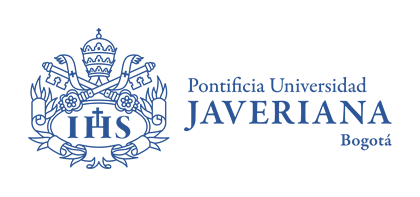
</center>

<font color='#3d67ff' size=30> <center>
**Procesamiento de Datos a Gran Escala**  
API
</center></font>

<font color='#00000' size=10> <center>
**Calidad de Vida en NYC**
</center></font>


# <font color='#3d67ff'> **Objetivo** </font>

#### **Aumentar en al menos un 20% la calidad de vida de los habitantes de Nueva York durante el primer año del desarrollo del plan de acción.**

## Imports necesarios

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests as req
import json as json
import matplotlib.pyplot as plt

## Carga de Datos

In [2]:
url = "http://api.openweathermap.org/data/2.5/forecast?lat=40.42&lon=74.00&appid=c63e998b5b88e7622d06186e4705d9cb" # URL de la API a acceder con la llave necesaria

In [3]:
data = (req.get(url)).json() # Obtener la información de la API y transformarla en el formato JSON

In [4]:
df = pd.DataFrame(data['list']) # Convertir la información en un dataframe para su análisis y exploración

## Métodos útiles

In [5]:
def create_array(temp):
  hum = []
  arraytemp = []
  for i in temp:
    hum.append(i.get("humidity"))
    arraytemp.append(i.get("temp")-273.15)

  return hum, arraytemp

## Exploración de los datos

In [6]:
# Conocer las dimensiones del dataframe 
df.shape 

(40, 10)

In [7]:
# Identificar columnas, su tipo de dato y la cantidad de registros no nulos por cada atributo del dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          40 non-null     int64  
 1   main        40 non-null     object 
 2   weather     40 non-null     object 
 3   clouds      40 non-null     object 
 4   wind        40 non-null     object 
 5   visibility  40 non-null     int64  
 6   pop         40 non-null     float64
 7   sys         40 non-null     object 
 8   dt_txt      40 non-null     object 
 9   rain        9 non-null      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.2+ KB


In [8]:
# Visualizar los primeros 5 registros del dataset
df.head(5)

,dt,main,weather,clouds,wind,visibility,pop,sys,dt_txt,rain
0,1663567200,"{'temp': 288.82, 'feels_like': 287.51, 'temp_m...","[{'id': 803, 'main': 'Clouds', 'description': ...",{'all': 54},"{'speed': 1.79, 'deg': 113, 'gust': 2.21}",10000,0.04,{'pod': 'd'},2022-09-19 06:00:00,NaN
1,1663578000,"{'temp': 291.46, 'feels_like': 290.23, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 58},"{'speed': 1.78, 'deg': 268, 'gust': 2.64}",10000,0.36,{'pod': 'd'},2022-09-19 09:00:00,{'3h': 0.18}
2,1663588800,"{'temp': 291.81, 'feels_like': 290.54, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 56},"{'speed': 2.25, 'deg': 284, 'gust': 2.03}",10000,0.36,{'pod': 'd'},2022-09-19 12:00:00,{'3h': 0.24}
3,1663599600,"{'temp': 286.34, 'feels_like': 284.89, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 33},"{'speed': 0.6, 'deg': 237, 'gust': 1}",10000,0.36,{'pod': 'n'},2022-09-19 15:00:00,{'3h': 0.16}
4,1663610400,"{'temp': 285.45, 'feels_like': 284.09, 'temp_m...","[{'id': 801, 'main': 'Clouds', 'description': ...",{'all': 21},"{'speed': 2.78, 'deg': 136, 'gust': 2.72}",10000,0.08,{'pod': 'n'},2022-09-19 18:00:00,NaN


In [9]:
# Mostrar los valores únicos para cada una de las columnas del dataset
for col in df:
  print(col+":\n", df[col].value_counts())

dt:
 1663567200    1
1663578000    1
1663804800    1
1663815600    1
1663826400    1
1663837200    1
1663848000    1
1663858800    1
1663869600    1
1663880400    1
1663891200    1
1663902000    1
1663912800    1
1663923600    1
1663934400    1
1663945200    1
1663956000    1
1663966800    1
1663977600    1
1663794000    1
1663783200    1
1663772400    1
1663664400    1
1663588800    1
1663599600    1
1663610400    1
1663621200    1
1663632000    1
1663642800    1
1663653600    1
1663675200    1
1663761600    1
1663686000    1
1663696800    1
1663707600    1
1663718400    1
1663729200    1
1663740000    1
1663750800    1
1663988400    1
Name: dt, dtype: int64
main:
 {'temp': 288.82, 'feels_like': 287.51, 'temp_min': 288.82, 'temp_max': 291.86, 'pressure': 1018, 'sea_level': 1018, 'grnd_level': 787, 'humidity': 41, 'temp_kf': -3.04}    1
{'temp': 291.46, 'feels_like': 290.23, 'temp_min': 291.46, 'temp_max': 293.54, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 787, 'humidity': 34, 

In [10]:
# Generar descriptivos estadísticos de las columnas numéricas del dataset
df.describe(include='object')

,main,weather,clouds,wind,sys,dt_txt,rain
count,40,40,40,40,40,40,9
unique,40,12,29,40,2,40,9
top,"{'temp': 288.82, 'feels_like': 287.51, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 100},"{'speed': 1.79, 'deg': 113, 'gust': 2.21}",{'pod': 'd'},2022-09-19 06:00:00,{'3h': 0.18}
freq,1,6,5,1,20,1,1


In [11]:
# Se muestra cuánta memoria utiliza cada columna en bytes
df.memory_usage()

Index         128
dt            320
main          320
weather       320
clouds        320
wind          320
visibility    320
pop           320
sys           320
dt_txt        320
rain          320
dtype: int64

## Visualización

In [12]:
df

,dt,main,weather,clouds,wind,visibility,pop,sys,dt_txt,rain
0,1663567200,"{'temp': 288.82, 'feels_like': 287.51, 'temp_m...","[{'id': 803, 'main': 'Clouds', 'description': ...",{'all': 54},"{'speed': 1.79, 'deg': 113, 'gust': 2.21}",10000,0.04,{'pod': 'd'},2022-09-19 06:00:00,NaN
1,1663578000,"{'temp': 291.46, 'feels_like': 290.23, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 58},"{'speed': 1.78, 'deg': 268, 'gust': 2.64}",10000,0.36,{'pod': 'd'},2022-09-19 09:00:00,{'3h': 0.18}
2,1663588800,"{'temp': 291.81, 'feels_like': 290.54, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 56},"{'speed': 2.25, 'deg': 284, 'gust': 2.03}",10000,0.36,{'pod': 'd'},2022-09-19 12:00:00,{'3h': 0.24}
3,1663599600,"{'temp': 286.34, 'feels_like': 284.89, 'temp_m...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 33},"{'speed': 0.6, 'deg': 237, 'gust': 1}",10000,0.36,{'pod': 'n'},2022-09-19 15:00:00,{'3h': 0.16}
4,1663610400,"{'temp': 285.45, 'feels_like': 284.09, 'temp_m...","[{'id': 801, 'main': 'Clouds', 'description': ...",{'all': 21},"{'speed': 2.78, 'deg': 136, 'gust': 2.72}",10000,0.08,{'pod': 'n'},2022-09-19 18:00:00,NaN
5,1663621200,"{'temp': 284.35, 'feels_like': 283.25, 'temp_m...","[{'id': 800, 'main': 'Clear', 'description': '...",{'all': 4},"{'speed': 3.29, 'deg': 137, 'gust': 3.08}",10000,0.00,{'pod': 'n'},2022-09-19 21:00:00,NaN
6,1663632000,"{'temp': 283.35, 'feels_like': 282.2, 'temp_mi...","[{'id': 800, 'main': 'Clear', 'description': '...",{'all': 5},"{'speed': 3.53, 'deg': 139, 'gust': 3.39}",10000,0.00,{'pod': 'n'},2022-09-20 00:00:00,NaN
7,1663642800,"{'temp': 288.35, 'feels_like': 287.21, 'temp_m...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 43},"{'speed': 3.16, 'deg': 130, 'gust': 3.59}",10000,0.00,{'pod': 'd'},2022-09-20 03:00:00,NaN
8,1663653600,"{'temp': 292.77, 'feels_like': 291.68, 'temp_m...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 41},"{'speed': 2.55, 'deg': 122, 'gust': 2.55}",10000,0.00,{'pod': 'd'},2022-09-20 06:00:00,NaN
9,1663664400,"{'temp': 294.96, 'feels_like': 293.9, 'temp_mi...","[{'id': 500, 'main': 'Rain', 'description': 'l...",{'all': 29},"{'speed': 2.55, 'deg': 305, 'gust': 4.24}",10000,0.40,{'pod': 'd'},2022-09-20 09:00:00,{'3h': 0.2}


In [13]:
temperature = df.get("main") # Obtener los valores de la columna main (temperatura)
hours = df.get("dt_txt")    # Obtener los valores de la columma dt_txt (horas)

In [14]:
humidity, arrayTemp = create_array(temperature)

Text(0.5, 1.0, 'Temperatura por Hora')

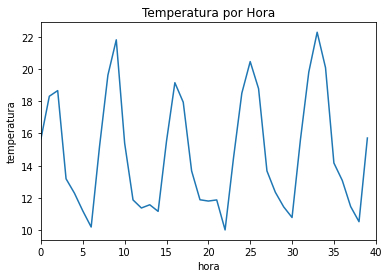

In [15]:
plt.plot(arrayTemp)                  # Creación del gráfico 
plt.xlim([0, 40])                    # Asignar los límites del eje X
plt.xlabel('hora')                   # Asignarle el nombre al eje X
plt.ylabel('temperatura')            # Asiganrle el nombre al eje Y
plt.title('Temperatura por Hora')    # Asignarle título al gráfico